In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from numpy import asarray
import seaborn as sns
import rioxarray as rxr
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import xarray as xr
import pandas as pd
import glob
import os
import rasterstats as rs
from rasterstats import zonal_stats, point_query
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
PS_NDCI = '/mnt/nfs/lss/meerdink/data/backed_up/skzebarth/24_spring/GP_GP_Final/PlanetScope_BSL_NDCI.tif'
sampling_points = '/mnt/nfs/lss/meerdink/data/backed_up/skzebarth/23_BSL/9_11_23_loqate/9_11_23.shp'

In [3]:
NDCI = rio.open(PS_NDCI)
SP = gpd.read_file(sampling_points)
SP_transform = SP.to_crs(32615)
SP_transform.crs

<Derived Projected CRS: EPSG:32615>
Name: WGS 84 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°W and 90°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Ontario. Ecuador -Galapagos. Guatemala. Mexico. United States (USA).
- bounds: (-96.0, 0.0, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
chl = SP['Value']

In [7]:
R_ZS = zonal_stats(SP_transform, PS_NDCI)
R_PQ = point_query(SP_transform, PS_NDCI)
R_PQ

[nan,
 0.16846320307072887,
 0.1682195778935954,
 0.18295977992181234,
 0.1157651507579917,
 nan,
 nan,
 0.18710362733015473,
 0.19752889559623893,
 0.17413990056642606,
 0.16254897879837676,
 nan,
 nan,
 nan,
 0.1846697963295681,
 0.2028932024425436,
 0.18608598404382182,
 0.19630349691101884,
 0.1991474827116547,
 0.16488279455753632,
 0.19242782834784958,
 0.17052092635340393,
 nan,
 nan,
 nan,
 0.1822126988572052,
 0.14343199204718046,
 0.15221307582761798,
 nan,
 nan,
 nan,
 0.1916019264283962,
 0.22127556075862972,
 0.16732828603256758,
 0.17372973685802073,
 0.18386135940689033,
 0.18672088868991293,
 0.18177220380556336,
 0.17541004348583755,
 nan]

In [8]:
R_ZS

[{'count': 0, 'min': None, 'max': None, 'mean': None},
 {'min': 0.16521738469600677,
  'max': 0.16521738469600677,
  'mean': 0.16521738469600677,
  'count': 1},
 {'min': 0.16228070855140686,
  'max': 0.16228070855140686,
  'mean': 0.16228070855140686,
  'count': 1},
 {'min': 0.18268215656280518,
  'max': 0.18268215656280518,
  'mean': 0.18268215656280518,
  'count': 1},
 {'min': 0.14757709205150604,
  'max': 0.14757709205150604,
  'mean': 0.14757709205150604,
  'count': 1},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'min': 0.16450215876102448,
  'max': 0.16450215876102448,
  'mean': 0.16450215876102448,
  'count': 1},
 {'min': 0.199148029088974,
  'max': 0.199148029088974,
  'mean': 0.199148029088974,
  'count': 1},
 {'min': 0.2078189253807068,
  'max': 0.2078189253807068,
  'mean': 0.2078189253807068,
  'count': 1},
 {'min': 0.1736263781785965,
  'max': 0.1736263781785965,
  'mean': 0.1736263781785965,
  'count': 1},

In [6]:
mean = [point['mean'] for point in R_ZS]
mean

[None,
 0.16521738469600677,
 0.16228070855140686,
 0.18268215656280518,
 0.14757709205150604,
 None,
 None,
 0.16450215876102448,
 0.199148029088974,
 0.2078189253807068,
 0.1736263781785965,
 None,
 None,
 None,
 0.1786903440952301,
 0.20515574514865875,
 0.19549642503261566,
 0.19339163601398468,
 0.1965150088071823,
 0.15550978481769562,
 0.17782427370548248,
 0.1636771261692047,
 None,
 None,
 None,
 0.18421052396297455,
 0.16496598720550537,
 0.1715555489063263,
 None,
 None,
 None,
 0.19351570308208466,
 0.22027289867401123,
 0.16788321733474731,
 0.17039921879768372,
 0.18885448575019836,
 0.1985226273536682,
 0.18896833062171936,
 0.19565217196941376,
 None]

In [13]:
chl

0     34
1     29
2     40
3     25
4     36
5     23
6     21
7     31
8     22
9     37
10    30
11    21
12    23
13    25
14    22
15    28
16    27
17    33
18    33
19    34
20    35
21    23
22    32
23    32
24    44
25    15
26    40
27    30
28    28
29    27
30    32
31    31
32    26
33    16
34    29
35    38
36    19
37    43
38    24
39    39
Name: Value, dtype: int64

In [12]:
x = np.array(mean)
y = np.array(chl)
df = pd.DataFrame({'x': x, 'y': y})
df_clean = df.dropna(subset=['x'])
df_final = df_clean[(df_clean['x'] <=1) & (df_clean['x'] >= -1)]
df_final

,x,y
1,0.165217,29
2,0.162281,40
3,0.182682,25
4,0.147577,36
7,0.164502,31
8,0.199148,22
9,0.207819,37
10,0.173626,30
14,0.17869,22
15,0.205156,28


In [13]:
new_x = list(df_final['x'])
new_y = list(df_final['y'])

slope, intercept, r_value, p_value, std_err = linregress(new_x, new_y)
r_squared = r_value**2
#r_squared
r_squared

0.03167885724533741

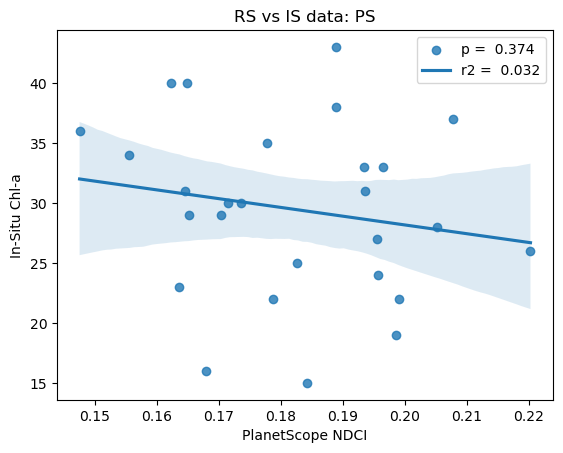

In [14]:
sns.regplot(x=new_x, y=new_y, order=1)
plt.xlabel('PlanetScope NDCI')
plt.ylabel('In-Situ Chl-a')
plt.title('RS vs IS data: PS')
plt.legend([f'p = {p_value: .3f}', f'r2 = {r_squared: .3f}'])
plt.show()